## Feature Scaling

The scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Standardisation**.

=================================================================

## Scaling to Minimum and Maximum values - MinMaxScaling

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the value range:

X_scaled = (X - X.min / (X.max - X.min)


The result of the above transformation is a distribution which values vary within the range of 0 to 1. But the mean is not centered at zero and the standard deviation varies across variables. The shape of a min-max scaled distribution will be similar to the original variable, but the variance may change, so not identical. This scaling technique is also sensitive to outliers.

This technique will not **normalize the distribution of the data** thus if this is the desired outcome, we should implement any of the variable transformation techniques.

In a nutshell, MinMaxScaling:

- does not center the mean at 0
- variance varies across variables
- may not preserve the shape of the original distribution
- the minimum and maximum values are 0 and 1.
- sensitive outliers


## In this demo

We will perform scaling to minimum and maximum values using the Boston House Prices data set that comes with Scikit-learn

In [75]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler

In [76]:
# load dataset
boston = load_boston()
boston

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [77]:
# convert it into a DataFrame
data = pd.DataFrame(boston.data, columns=boston.feature_names)

data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [78]:
# describe 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### MinMaxScaling

The MinMaxScaler from scikit-learn subtracts the minimum value and re-scales the the value range, rendering the variable values between 0 and 1. 

In [79]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis = 1),
                                                   data['MEDV'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [80]:
# initialize the MinMaxScaler Object
scaler = MinMaxScaler()

In [81]:
scaler.fit(X_train)

MinMaxScaler()

In [82]:
scaler.data_max_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [83]:
scaler.data_min_

array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1742e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00])

In [84]:
scaler.data_range_

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.219000e+00, 9.710000e+01, 1.095230e+01,
       2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
       3.525000e+01])

In [85]:
# transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [87]:
# let's have a look at the original training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.

np.round(X_train.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.4,8.4,0.0,0.1,0.3,3.1,89.0
ZN,354.0,11.8,23.7,0.0,0.0,0.0,20.0,100.0
INDUS,354.0,11.1,7.0,0.5,5.0,8.6,18.1,27.7
CHAS,354.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
NOX,354.0,0.6,0.1,0.4,0.4,0.5,0.6,0.9
RM,354.0,6.3,0.7,3.6,5.9,6.2,6.6,8.8
AGE,354.0,69.0,28.0,2.9,45.2,79.4,93.8,100.0
DIS,354.0,3.8,2.1,1.2,2.1,3.2,5.1,12.1
RAD,354.0,9.4,8.7,1.0,4.0,5.0,24.0,24.0
TAX,354.0,401.8,170.6,187.0,276.0,311.0,666.0,711.0


In [88]:
# let's have a look at the scaled training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0
ZN,354.0,0.1,0.2,0.0,0.0,0.0,0.2,1.0
INDUS,354.0,0.4,0.3,0.0,0.2,0.3,0.6,1.0
CHAS,354.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
NOX,354.0,0.4,0.2,0.0,0.1,0.3,0.5,1.0
RM,354.0,0.5,0.1,0.0,0.4,0.5,0.6,1.0
AGE,354.0,0.7,0.3,0.0,0.4,0.8,0.9,1.0
DIS,354.0,0.2,0.2,0.0,0.1,0.2,0.4,1.0
RAD,354.0,0.4,0.4,0.0,0.1,0.2,1.0,1.0
TAX,354.0,0.4,0.3,0.0,0.2,0.2,0.9,1.0


As expected, the minimum and maximum values for all the variables are 0 and 1, respectively. The mean is not centered at zero, and the variance changes.

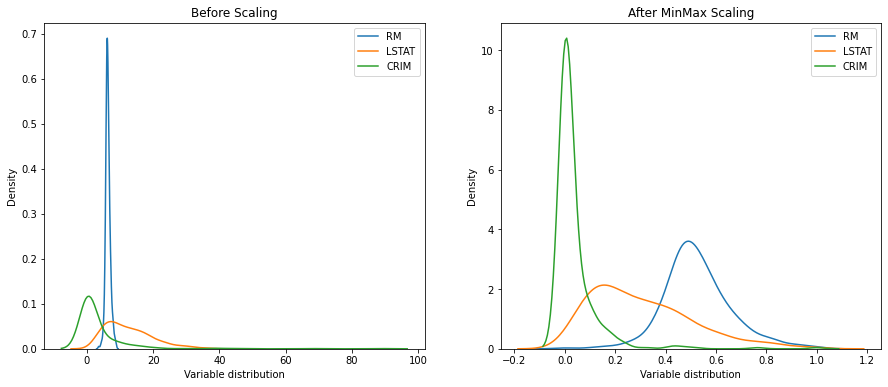

In [90]:
# lets check and compare the variable distribution before and after scaling

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.kdeplot(X_train['RM'], label='RM')
sns.kdeplot(X_train['LSTAT'],label='LSTAT')
sns.kdeplot(X_train['CRIM'],label='CRIM')
plt.xlabel('Variable distribution')
plt.legend(loc='best')
plt.title('Before Scaling')


plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled['RM'],label='RM')
sns.kdeplot(X_train_scaled['LSTAT'],label='LSTAT')
sns.kdeplot(X_train_scaled['CRIM'],label='CRIM')
plt.xlabel('Variable distribution')
plt.legend(loc='best')
plt.title('After MinMax Scaling')

plt.show();

We can see that the values are now capped at 1, but the distributions are not centered.

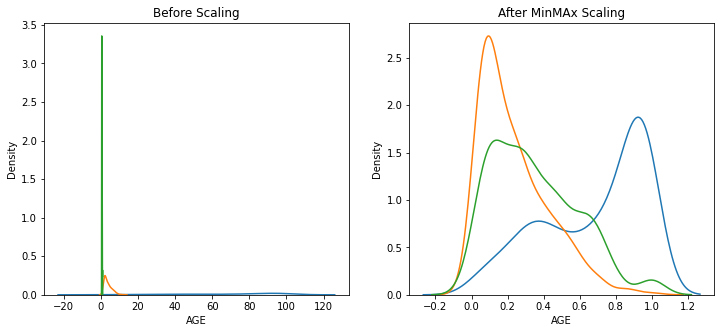

In [92]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After MinMAx Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

In [93]:
X_train['AGE'].min(), X_train['AGE'].max(), 

(2.9, 100.0)

In [94]:
X_train['NOX'].min(), X_train['NOX'].max(), 

(0.385, 0.871)

In the above plot, we can see how, by scaling, the variable NOX, which varied across a very narrow range of values [0-1], and AGE which varied across [0-100], now spread over a more homogeneous range of values, so that we can compare them directly in one plot, whereas before it was difficult. In a linear model, AGE would dominate the output, but after standardisation, both variables will be able to have an input (assuming that they are both predictive).  

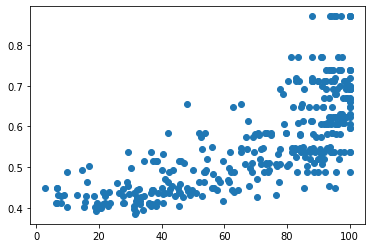

In [95]:
plt.scatter(X_train['AGE'], X_train['NOX'])

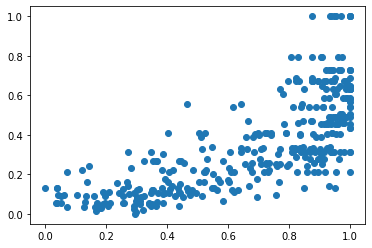

In [96]:
plt.scatter(X_train_scaled['AGE'], X_train_scaled['NOX'])

- We can see here in the scatter plot also, the distribution for these two variables are now more homogenous